In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv
/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv


# Importing Required Libraries

In [148]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Import Label Encoder and train_test_split, gridsearchcv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

# for min_max scaling
from sklearn.preprocessing import MinMaxScaler

# Import models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

# Import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Observing Data

In [381]:
data = pd.read_csv('/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv')
df = data.copy()

# Observe the 5 rows
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [67]:
# Number of Rows, Columns
df.shape

(34857, 21)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [69]:
# Memory usage statistics for each columns
df.memory_usage()

Index               128
Suburb           278856
Address          278856
Rooms            278856
Type             278856
Price            278856
Method           278856
SellerG          278856
Date             278856
Distance         278856
Postcode         278856
Bedroom2         278856
Bathroom         278856
Car              278856
Landsize         278856
BuildingArea     278856
YearBuilt        278856
CouncilArea      278856
Lattitude        278856
Longtitude       278856
Regionname       278856
Propertycount    278856
dtype: int64

# Exploratory Data Analysis

In [382]:
# Select columns with data type 'object'
columns_to_convert = df.select_dtypes(include=['object']).columns

# Apply the mask to select the columns and convert object columns to categorical 
# to get advantage for memory usage, performance and better semantics.
df[columns_to_convert] = df[columns_to_convert].astype('category')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  float64 
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

In [72]:
# Memory usage statistics for each columns after convert data types
df.memory_usage()

Index                128
Suburb             80818
Address          1468308
Rooms             278856
Type               34989
Price             278856
Method             35229
SellerG            81114
Date               37585
Distance          278856
Postcode          278856
Bedroom2          278856
Bathroom          278856
Car               278856
Landsize          278856
BuildingArea      278856
YearBuilt         278856
CouncilArea        36193
Lattitude         278856
Longtitude        278856
Regionname         35221
Propertycount     278856
dtype: int64

In [73]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [74]:
# Correlation Analysis
df.corr(numeric_only=True).T

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.465238,0.271511,0.085890,0.946755,0.611826,0.393878,0.037402,0.156229,-0.012749,0.004872,0.103235,-0.071677
Price,0.465238,1.000000,-0.211384,0.044950,0.430275,0.429878,0.201803,0.032748,0.100754,-0.333306,-0.215607,0.197874,-0.059017
Distance,0.271511,-0.211384,1.000000,0.481566,0.269524,0.126201,0.241835,0.060862,0.076301,0.323059,-0.100417,0.200946,-0.018140
Postcode,0.085890,0.044950,0.481566,1.000000,0.089292,0.120080,0.067886,0.040664,0.042437,0.089805,-0.231027,0.362895,0.017108
Bedroom2,0.946755,0.430275,0.269524,0.089292,1.000000,0.614892,0.388491,0.037019,0.154157,-0.002022,0.003447,0.106164,-0.053451
Bathroom,0.611826,0.429878,0.126201,0.120080,0.614892,1.000000,0.307518,0.036333,0.147558,0.167955,-0.059183,0.106531,-0.032887
Car,0.393878,0.201803,0.241835,0.067886,0.388491,0.307518,1.000000,0.037829,0.104373,0.128702,-0.009020,0.047213,-0.009617
Landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037829,1.000000,0.354530,0.044474,0.025318,-0.002582,-0.018195
BuildingArea,0.156229,0.100754,0.076301,0.042437,0.154157,0.147558,0.104373,0.354530,1.000000,0.067811,0.017155,-0.002143,-0.024523
YearBuilt,-0.012749,-0.333306,0.323059,0.089805,-0.002022,0.167955,0.128702,0.044474,0.067811,1.000000,0.091592,-0.022175,0.022420


In [75]:
df.corrwith(other=df["Price"], numeric_only=True)

Rooms            0.465238
Price            1.000000
Distance        -0.211384
Postcode         0.044950
Bedroom2         0.430275
Bathroom         0.429878
Car              0.201803
Landsize         0.032748
BuildingArea     0.100754
YearBuilt       -0.333306
Lattitude       -0.215607
Longtitude       0.197874
Propertycount   -0.059017
dtype: float64

Here's what we can interpret from the correlation results:

*Rooms (0.465238):* There is a moderate positive correlation (0.47) between the number of rooms and the price. This suggests that as the number of rooms in a property increases, the price tends to increase, although other factors could also influence price.

*Price (1.000000):* The correlation of a variable with itself is always 1, as it's a perfect positive correlation. This is expected, as you're comparing "Price" with itself.

*Distance (-0.211384):* There is a weak negative correlation (-0.21) between the distance from the property to a reference point (e.g., city center) and the price. This implies that, on average, as the distance increases, the property price tends to decrease slightly.

*Postcode (0.044950):* There's a very weak positive correlation (0.04) between the postcode and price, which may not be practically significant.

*Bedroom2 (0.430275):* There is a moderate positive correlation (0.43) between the number of bedrooms and the price. More bedrooms tend to be associated with higher property prices.

*Bathroom (0.429878):* Similar to the number of bedrooms, the number of bathrooms also shows a moderate positive correlation (0.43) with the price.

*Car (0.201803):* The number of car spaces available in the property has a weak positive correlation (0.20) with the price.

*Landsize (0.032748):* The correlation between land size and price is very weak (0.03), suggesting that land size has little impact on property price.

*BuildingArea (0.100754):* There's a weak positive correlation (0.10) between the building area and price, indicating that properties with larger building areas tend to have higher prices.

*YearBuilt (-0.333306):* There is a moderate negative correlation (-0.33) between the year the property was built and the price. Newer properties tend to have higher prices, on average.

*Lattitude (-0.215607):* There's a weak negative correlation (-0.22) between the latitude of the property and the price. This suggests that properties located farther south might have slightly lower prices, on average.

*Longtitude (0.197874):* There's a weak positive correlation (0.20) between the longitude of the property and the price, indicating that properties located farther to the east might have slightly higher prices, on average.

*Propertycount (-0.059017):* There's a very weak negative correlation (-0.06) between the property count and the price, but this correlation is not significant.

In [192]:
# Count the number of missing data
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [119]:
# Check duplicate rows
df[df.duplicated()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [383]:
# Delete duplicates
df.drop_duplicates(inplace=True)

In [153]:
# Checking unique values of categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f'Column "{column}" unique values: {unique_values}')

Column "Suburb" unique values: ['Abbotsford', 'Airport West', 'Albert Park', 'Alphington', 'Altona', ..., 'Fawkner Lot', 'Ferny Creek', 'Wandin North', 'Kalkallo', 'Menzies Creek']
Length: 351
Categories (351, object): ['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale', ..., 'Yarra Glen', 'Yarraville', 'croydon', 'viewbank']
Column "Address" unique values: ['68 Studley St', '85 Turner St', '25 Bloomburg St', '18/659 Victoria St', '5 Charles St', ..., '78 Bayview Rd', '29A Murray St', '147A Severn St', '12/37 Stephen St', '3 Tarrengower St']
Length: 34009
Categories (34009, object): ['1 Abercrombie St', '1 Aberfeldie Wy', '1 Acacia St', '1 Acheron Av', ..., '9b Bewdley St', '9b Latham St', '9b Marquis Rd', '9b Stewart St']
Column "Type" unique values: ['h', 'u', 't']
Categories (3, object): ['h', 't', 'u']
Column "Method" unique values: ['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA']
Categories (9, object): ['PI', 'PN', 'S', 'SA', ..., 'SP', 'SS', 'VB', 'W']
Column "SellerG" 

## Remove Outliers using Z-score Method

We calculate z-score using the following formula:

$z=\frac{x-\mu}{\sigma}$

To identify and remove outliers using the z-score, we will need to calculate the z-score of each value in our dataset, and then remove values that are above 3 or below -3.

In [384]:
numerical_columns = df.select_dtypes(exclude="category").columns

z_score_threshold = 3

for col in numerical_columns:
    z_scores = (df[col] - df[col].mean())/df[col].std()
    outliers = (z_scores < -z_score_threshold) | (z_scores > z_score_threshold)
    print("Outlier counts of column:", col, df[col][outliers].count())
    #df[col]=df[col][~outliers]
    df[col][outliers] = np.nan # replace with nan

Outlier counts of column: Rooms 269
Outlier counts of column: Price 474
Outlier counts of column: Distance 792
Outlier counts of column: Postcode 558
Outlier counts of column: Bedroom2 73
Outlier counts of column: Bathroom 371
Outlier counts of column: Car 353
Outlier counts of column: Landsize 43
Outlier counts of column: BuildingArea 9
Outlier counts of column: YearBuilt 9
Outlier counts of column: Lattitude 324
Outlier counts of column: Longtitude 315
Outlier counts of column: Propertycount 844


/tmp/ipykernel_32/1793096115.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][outliers] = np.nan # replace with nan


## Filling Missing Values

In [301]:
df.isna().sum()

Suburb               0
Address              0
Rooms              269
Type                 0
Price             8083
Method               0
SellerG              0
Date                 0
Distance           793
Postcode           559
Bedroom2          8290
Bathroom          8597
Car               9081
Landsize         11853
BuildingArea     21124
YearBuilt        19315
CouncilArea          3
Lattitude         8300
Longtitude        8291
Regionname           3
Propertycount      847
dtype: int64

In [385]:
# Remove features that has a very weak correlation with price, address is not necessary
df.drop(columns=["Postcode", "Landsize", "BuildingArea", 
                 "Lattitude", "Longtitude", "Propertycount"], inplace=True)

In [386]:
df.isna().sum()

Suburb             0
Address            0
Rooms            269
Type               0
Price           8083
Method             0
SellerG            0
Date               0
Distance         793
Bedroom2        8290
Bathroom        8597
Car             9081
YearBuilt      19315
CouncilArea        3
Regionname         3
dtype: int64

In [387]:
# Fill the missing values of Bathroom and Car with mode
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['Car'].fillna(df['Car'].mode()[0], inplace=True)

In [388]:
# Check the common value of Bedroom2 by grouping Rooms and Type
df[["Rooms", "Type","Bedroom2"]].groupby(["Type","Rooms"]).agg(pd.Series.mode)

Bedroom2
Type Rooms          
h    1.0         1.0
     2.0         2.0
     3.0         3.0
     4.0         4.0
     5.0         5.0
t    1.0         1.0
     2.0         2.0
     3.0         3.0
     4.0         4.0
     5.0         5.0
u    1.0         1.0
     2.0         2.0
     3.0         3.0
     4.0         4.0
     5.0         5.0

In [389]:
# Replace missing room values with Bedroom2 if any.
missing_room_idx=df.loc[df["Rooms"].isna()]["Rooms"].index.tolist()

for i in missing_room_idx:
    df.loc[i, "Rooms"] = df._get_value(i, "Bedroom2")

In [390]:
# Delete the remaining rows with missing room and drop Bedroom2
df.dropna(axis=0, subset="Rooms", inplace=True)
df.drop(columns=["Bedroom2"], inplace=True)

In [391]:
df.isna().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price           8048
Method             0
SellerG            0
Date               0
Distance         789
Bathroom           0
Car                0
YearBuilt      19254
CouncilArea        3
Regionname         3
dtype: int64

In [412]:
# Check missing Regionname rows.
df.loc[df["Regionname"].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bathroom,Car,YearBuilt,CouncilArea,Regionname
18523,Footscray,2/16 Stafford St,2.0,u,710000.0,S,Jas,15/07/2017,5.1,1.0,2.0,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2.0,h,825000.0,VB,Jellis,11/11/2017,7.7,1.0,2.0,NaN,NaN,NaN
29483,Fawkner Lot,1/3 Brian St,3.0,h,616000.0,SP,Brad,6/01/2018,NaN,1.0,2.0,NaN,NaN,NaN


In [421]:
# Replace missing Regionname with value that is in same Suburb or same Address
df.loc[18523 ,"Regionname"] = df[df["Suburb"] == "Footscray"]["Regionname"].mode()[0]
df.loc[26888 ,"Regionname"] = df[df["Suburb"] == "Camberwell"]["Regionname"].mode()[0]
df.loc[29483 ,"Regionname"] = df[df["Address"].str.contains("Brian St")]["Regionname"].mode()[0]

In [426]:
# Check missing CouncilArea rows.
df.loc[df["CouncilArea"].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bathroom,Car,YearBuilt,CouncilArea,Regionname
18523,Footscray,2/16 Stafford St,2.0,u,710000.0,S,Jas,15/07/2017,5.1,1.0,2.0,NaN,NaN,Western Metropolitan
26888,Camberwell,2/3 Kingsley St,2.0,h,825000.0,VB,Jellis,11/11/2017,7.7,1.0,2.0,NaN,NaN,Southern Metropolitan
29483,Fawkner Lot,1/3 Brian St,3.0,h,616000.0,SP,Brad,6/01/2018,NaN,1.0,2.0,NaN,NaN,Northern Metropolitan


In [447]:
# Replace missing CouncilArea with the most common value that is in same suburb
df.loc[18523 ,"CouncilArea"] = df[df["Suburb"] == "Footscray"]["CouncilArea"].mode()[0]
df.loc[26888 ,"CouncilArea"] = df[df["Suburb"] == "Camberwell"]["CouncilArea"].mode()[0]
df.loc[29483 ,"CouncilArea"] = df[df["Address"].str.contains("Brian St")]["CouncilArea"].mode()[0]

In [38]:
# Find max distance of houses by grouping YearBuilt.
grouped_yearBuilt_by_distance=df[["Distance", "YearBuilt"]].groupby("YearBuilt").max()

# Since distance and yearbuilt have a strong correlation with each other than the others, 
# we can replace missing null distance values with checking same yearbuilt.
for k1, v1 in df[df["Distance"].isna()][["Distance", "YearBuilt"]].iterrows():
    for year, val in grouped_yearBuilt_by_distance.iterrows():
        if(v1["YearBuilt"] == year):
            df.at[k1, "Distance"] = val["Distance"]

In [39]:
# Check remaining missing values
df.isna().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price           8048
Method             0
SellerG            0
Date               0
Distance         390
Bathroom           0
Car                0
YearBuilt      19254
CouncilArea        0
Regionname         0
dtype: int64

In [40]:
# Remove all rows that has missing val in Distance
# Yearbuilt has a lot of missing values so it will be discarded
# Address is not necessary because of suburb and regionname features
# Date is not necessary
df.dropna(axis=0, subset="Distance", inplace=True)
df.drop(["Address", "YearBuilt", "Date"],axis=1,inplace=True)

In [64]:
# Find mean price of houses by grouping Rooms and Regionname 
grouped_price=df[["Price", "Rooms", "Regionname"]].groupby(["Rooms", "Regionname"]).agg("mean")

# Replace missing null price with others in same regionname and same room numbers
for k1, v1 in df[df["Price"].isna()].iterrows():
    for k2, v2 in grouped_price.iterrows():
        if(v1["Rooms"] == k2[0] and v1["Regionname"] == k2[1]):
            df.at[k1, "Price"] = v2["Price"]

In [65]:
# Check remaining missing values
df.isna().sum()

Suburb         0
Rooms          0
Type           0
Price          2
Method         0
SellerG        0
Date           0
Distance       0
Bathroom       0
Car            0
CouncilArea    0
Regionname     0
dtype: int64

In [66]:
# Drop missing all rows in Price
df.dropna(axis=0, subset="Price", inplace=True)

In [140]:
# Final data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34378 entries, 0 to 34856
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Suburb       34378 non-null  category
 1   Rooms        34378 non-null  float64 
 2   Type         34378 non-null  category
 3   Price        34378 non-null  float64 
 4   Method       34378 non-null  category
 5   SellerG      34378 non-null  category
 6   Distance     34378 non-null  float64 
 7   Bathroom     34378 non-null  float64 
 8   Car          34378 non-null  float64 
 9   CouncilArea  34378 non-null  category
 10  Regionname   34378 non-null  category
dtypes: category(6), float64(5)
memory usage: 2.9 MB


## Data Visualization

<Axes: xlabel='Price', ylabel='Count'>

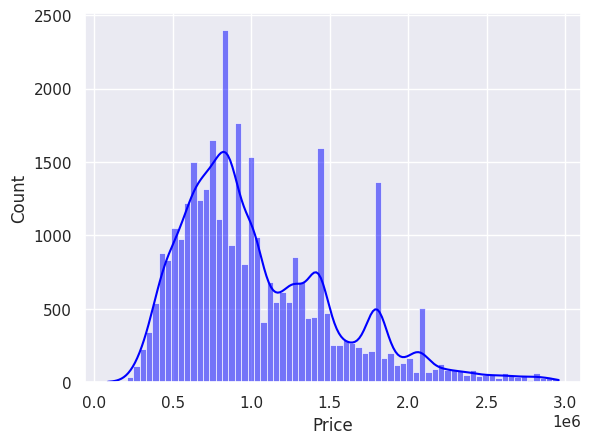

In [129]:
# Creates histogram to see price distribution
sns.histplot(data=df["Price"], kde=True, color="blue" )

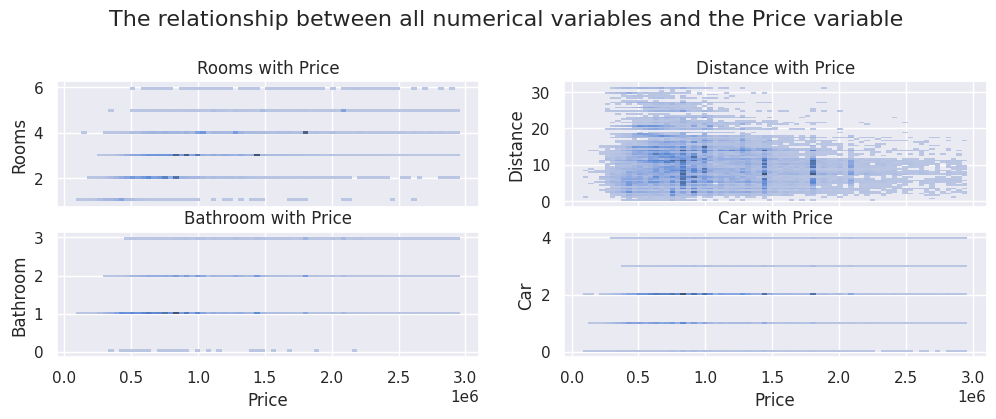

In [130]:
# Creates histogram to the relationships between numerical columns with price
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(12,4))
plt.subplots_adjust(top=0.80)
fig.suptitle('The relationship between all numerical variables and the Price variable', fontsize=16)
axes[0,0].set_title('Rooms with Price')
sns.histplot(ax=axes[0,0], data=df, x="Price", y="Rooms")

axes[0,1].set_title('Distance with Price')
sns.histplot(ax=axes[0,1], data=df, x="Price", y="Distance")

axes[1,0].set_title('Bathroom with Price')
sns.histplot(ax=axes[1,0], data=df, x="Price", y="Bathroom")

axes[1,1].set_title('Car with Price')
sns.histplot(ax=axes[1,1], data=df, x="Price", y="Car")
plt.savefig('relationship_with_price.png')

<Axes: >

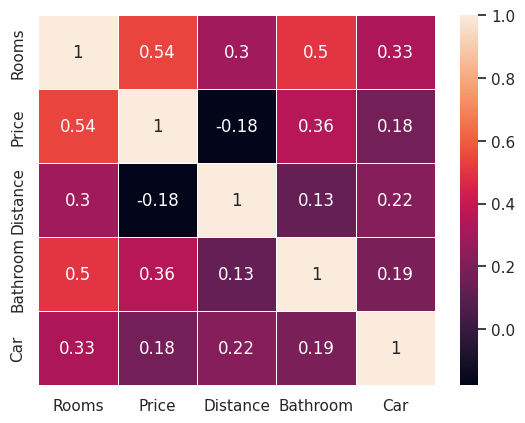

In [133]:
# Correlation Matrix
sns.heatmap(df.corr(numeric_only=True).T, annot=True, linewidths=.5)

## Label Encoding

In [141]:
transformed_df=df.copy()
categorical_columns = df.select_dtypes(include="category").columns

le = LabelEncoder()

for i in categorical_columns:
    transformed_df[i]=le.fit_transform(transformed_df[i])

In [142]:
transformed_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bathroom,Car,CouncilArea,Regionname
0,0,2.0,0,7.416325e+05,6,151,2.5,1.0,1.0,31,2
1,0,2.0,0,1.480000e+06,2,32,2.5,1.0,1.0,31,2
2,0,2.0,0,1.035000e+06,2,32,2.5,1.0,0.0,31,2
3,0,3.0,2,8.996065e+05,7,287,2.5,2.0,1.0,31,2
4,0,3.0,0,1.465000e+06,5,32,2.5,2.0,0.0,31,2


## Split dataset

In [144]:
X = transformed_df.drop(['Price'], axis = 1)
y = df['Price']

In [145]:
# Split the dataset into train and test sets with 80-20 ratio
X_train, X_test,y_train, y_test =train_test_split(X,y, test_size=0.2)

## Scale the Dataset by Normalizing

In [146]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data using the scaler to make the data between 0 and 1
scaled_training_df = scaler.fit_transform(X_train)

# Transform the test data, we use 'transform' method for scaling paramaters learned on the train data.
scaled_test_df=scaler.transform(X_test)

# Model Selection

In [147]:
def select_best_model(models, X, y, cv=10, scoring='neg_mean_squared_error'):
    """
    Selects the best model among a list of models using cross-validation and returns a DataFrame with model names and scores.
    
    Parameters:
    - models (dict): A dictionary of model names as keys and model objects as values.
    - X (array-like): The feature matrix.
    - y (array-like): The target variable.
    - cv (int, optional): Number of cross-validation folds (default is 5).
    - scoring (str, optional): Scoring metric for cross-validation (default is 'neg_mean_squared_error').
    
    Returns:
    - results_df (DataFrame): A DataFrame with two columns - 'Model' and 'RMSE Score'.
    """
    model_names = []
    rmse_scores = []
    
    for model_name, model in models.items():
        # Perform cross-validation
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        rmse_score = np.mean(np.sqrt(np.abs(cv_scores)))
        
        # Append the model name and its scores to the lists
        model_names.append(model_name)
        rmse_scores.append(rmse_score)
    
    # Create a DataFrame from the lists
    results_df = pd.DataFrame({'Model': model_names, 'RMSE Score': rmse_scores})
    
    return results_df

In [1]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
}

# Call the function to select the best model and get the results DataFrame
results_df = select_best_model(models, X_train, y_train)

print("Model Comparison Results:")
print(results_df)

Model Comparison Results:
                       Model     RMSE Score
0          Linear Regression  354745.936205
1           Ridge Regression  354745.931786
2           Lasso Regression  354745.936184
3                 ElasticNet  366640.693345
4                        SVR  516878.355439
5              Decision Tree  333500.170068
6              Random Forest  265159.765886
7        KNeighborsRegressor  331776.987335
8  GradientBoostingRegressor  257735.602748
9          AdaBoostRegressor  374077.560784


A lower the Root Mean Squared Error (RMSE) indicates that the model's predictions are closer to the actual values, GradientBoostingRegressor is the best one.

## Hyper-parameter Optimization

In [1]:
# Grid Search CV
gb_reg = GradientBoostingRegressor()

# Define the hyperparameters and their possible values to search over
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 100, 200],
    'max_depth': [3, 4, 5], 
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)

# Perform the grid search on your data
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE Score:", np.sqrt(-grid_search.best_score_))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best RMSE Score: 250541.70470116823


In [2]:
selected_model = GradientBoostingRegressor(n_estimators=200, max_depth=5, 
                                           learning_rate=0.1, subsample=1)
final_model = selected_model.fit(X_train,y_train)
final_model_pred = final_model.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, final_model_pred)))

250705.3325109628


# Model Evaluation

In [3]:
print("Final Model Mean Squared Error", mean_squared_error(y_test, final_model_pred))
print("Final Model Root Mean Squared Error", math.sqrt(mean_squared_error(y_test, final_model_pred)))
print("Final Model Mean Absolute Error", mean_absolute_error(y_test, final_model_pred))
print("Final Model R2 Score", r2_score(y_test, final_model_pred))

Final Model Mean Squared Error 62853163749.43241
Final Model Root Mean Squared Error 250705.3325109628
Final Model Mean Absolute Error 174269.56102772543
Final Model R2 Score 0.7490256154392481
